In [1]:
!pip install segmentation-models-pytorch

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import glob
%matplotlib inline
import pandas as pd
from tqdm import tqdm

In [3]:
def create_mask(img):
    mask = img.copy()
    mask[mask>0] = 1
    return mask

In [4]:
def detect_largest_poly(mask: np.array) -> np.array:
    # преобразуем изображение в черно-белое
    #gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # находим контуры
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # инициализируем переменную для хранения площади наибольшего полигона
    largest_area = 0
    largest_contour = None

    # перебираем все контуры
    for contour in contours:
        # вычисляем площадь текущего полигона
        area = cv2.contourArea(contour)
        # если площадь текущего полигона больше площади наибольшего полигона, то сохраняем его площадь
        if area > largest_area:
            largest_area = area
            largest_contour = contour

    image_copy = np.zeros(mask.shape)
    # копируем текущий полигон в изображение-копию
    cv2.drawContours(image_copy, [largest_contour], -1, 255, cv2.FILLED)
    return image_copy

In [5]:
#path = r'E:\Files\data\cut_out'
path = r'E:\Загрузки\Даша15'

In [55]:
for filepath in tqdm(glob.glob(path + "/**/*.tif")):
    #print(filepath)
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    print(type(img), filepath)
    # Убираем вкрапления в маску
    #kernel = np.ones((5, 5), np.uint8)
    #mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #ask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #mask = cv2.dilate(mask, kernel, iterations=4)
    try: 
        mask = detect_largest_poly(img)
    except:
        continue
    # создаем папку
    folder = filepath.replace('cut_out', 'mask')
    folder = folder[:folder.find('k\\')+1]
    os.makedirs(folder, exist_ok=True)
    filename = filepath.split('\\')[-1]
    
    cv2.imwrite(os.path.join(folder, filename), mask.astype(np.float32))
    

  0%|                                                                                           | 0/52 [00:00<?, ?it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\Crasp_036a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\Crasp_052a.tif


  6%|████▊                                                                              | 3/52 [00:00<00:12,  4.06it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V3_Crasp_033a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V_Crasp_035a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V_Crasp_036a.tif


 13%|███████████▏                                                                       | 7/52 [00:01<00:06,  7.35it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V_Crasp_037a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V_Crasp_038a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Crasp\V_Crasp_051.tif


 17%|██████████████▎                                                                    | 9/52 [00:01<00:06,  6.46it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_001.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_003.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_004.tif


 25%|████████████████████▌                                                             | 13/52 [00:01<00:04,  8.64it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_005.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_007a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_022.tif


 31%|█████████████████████████▏                                                        | 16/52 [00:02<00:03,  9.42it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepiC\LepiC_023a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_021.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_023.tif


 37%|█████████████████████████████▉                                                    | 19/52 [00:02<00:03,  9.67it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_024.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_025.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_026.tif


 40%|█████████████████████████████████                                                 | 21/52 [00:02<00:03,  8.09it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_034.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid O-1\LepidO_035.tif


 44%|████████████████████████████████████▎                                             | 23/52 [00:03<00:03,  8.04it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_001.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_004.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_005.tif


 52%|██████████████████████████████████████████▌                                       | 27/52 [00:03<00:02, 10.30it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_006.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_018.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_019.tif


 56%|█████████████████████████████████████████████▋                                    | 29/52 [00:03<00:02, 10.30it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepid St-1\LepidSt_020.tif
<class 'NoneType'> E:\Files\data\cut_out\LepidKr\LepidKr_001.tif
<class 'NoneType'> E:\Files\data\cut_out\LepidKr\LepidKr_004.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_010a.tif


 62%|██████████████████████████████████████████████████▍                               | 32/52 [00:03<00:01, 13.05it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_011a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_014.tif


 65%|█████████████████████████████████████████████████████▌                            | 34/52 [00:04<00:02,  6.64it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_020.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_021a.tif


 73%|███████████████████████████████████████████████████████████▉                      | 38/52 [00:04<00:01,  7.34it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_023.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\LepidKr\LepidKr_025a.tif


 75%|█████████████████████████████████████████████████████████████▌                    | 39/52 [00:05<00:01,  7.74it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_001.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_002.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_003.tif


 79%|████████████████████████████████████████████████████████████████▋                 | 41/52 [00:05<00:01,  8.51it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_003b.tif


 85%|█████████████████████████████████████████████████████████████████████▍            | 44/52 [00:06<00:01,  6.09it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_004.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_005.tif


 88%|████████████████████████████████████████████████████████████████████████▌         | 46/52 [00:06<00:00,  7.20it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Leptas\O_Leptas_020.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_063a.tif


 90%|██████████████████████████████████████████████████████████████████████████        | 47/52 [00:06<00:00,  7.80it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_065.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_065a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_066a.tif


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 50/52 [00:06<00:00,  8.82it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_067a.tif
<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_077a.tif


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 51/52 [00:06<00:00,  5.69it/s]

<class 'numpy.ndarray'> E:\Files\data\cut_out\Lepthak\O_Lepthak_081.tif


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:07<00:00,  7.02it/s]


In [12]:
filepath = r'E:\Files\data\new_images\Leptsch_011.tif'
print(filepath)
#filepath = 'E:\\008.jpg'
#filepath = 'E:\Files\data\cut_out\LepidKr\LepidKr_001.tif'

img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(np.unique(img))
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#plt.imshow(img, cmap='gray')
#new_img = detect_largest_poly(img)
#plt.imshow(new_img, cmap='gray')

#cv2.imwrite('E:\\Files\\data\\sample.tif', new_img.astype(np.float32))

E:\Files\data\new_images\Leptsch_011.tif
<class 'numpy.ndarray'>
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [11]:
filepath = r'E:\Files\data\sample.tiff'
#filepath = 'E:\\008.jpg'
#filepath = 'E:\Files\data\cut_out\LepidKr\LepidKr_001.tif'

img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
np.unique(img)

[255.]


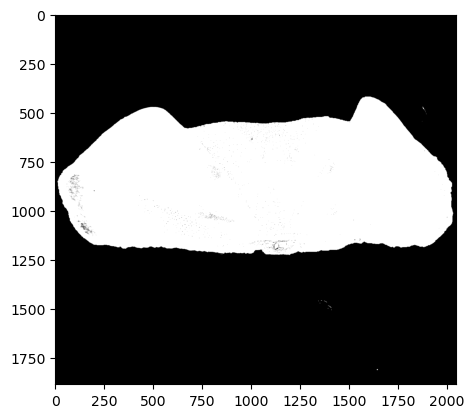

In [76]:
mask = create_mask(img)
cv2.imwrite(filepath.replace('cut_out', 'mask'), mask*255)
plt.imshow(mask, cmap='gray')


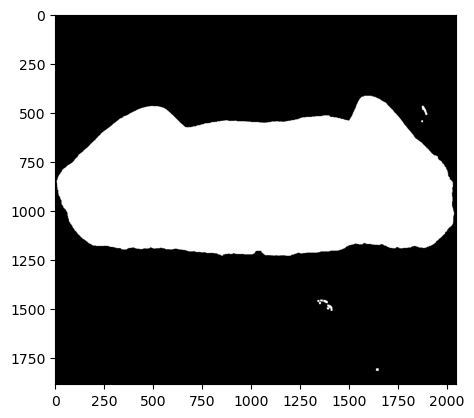

In [78]:
kernel = np.ones((3, 3), np.uint8)
#closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
dilate_mask = cv2.dilate(mask, kernel, iterations=4)
plt.imshow(dilate_mask, cmap='gray')

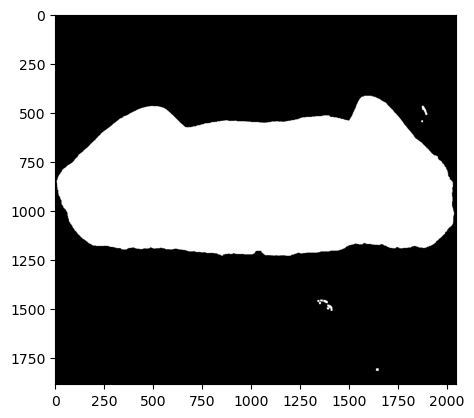

In [80]:
dilate_mask = cv2.morphologyEx(dilate_mask, cv2.MORPH_OPEN, kernel)
dilate_mask = cv2.morphologyEx(dilate_mask, cv2.MORPH_OPEN, kernel)
plt.imshow(dilate_mask, cmap='gray')